# Identitas & Definisi Hasil Pekerjaan
## Ivan Budianto

### shinsuketenma0603@gmail.com
### Submission Machine Learning Terapan

## Prediksi Penderita Penyakit Jantung Berdasarkan Statistik Kesehatan 

### Metode:
- Logistic Regression
- Random Forest

Melakukan import library yang dibutuhkan (Pandas, Sci-Kit Learn, Seaborn)

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

import seaborn as sns

# Pre-Processing

## Berikut adalah langkah-langkah yang saya lakukan dalam proses preprocessing data:
1. Memasukkan dataset kedalam dataframe dari file csv
2. Menandai *numerical features* dari data untuk mempermudah proses scaling menggunakan standard scaler
3. Melakukan drop di kolom education, karena kolom tersebut memiliki bobot yang kecil pada hasil akhir data, dan membuat fokus model berkurang.
4. Mengisi missing value dengan median. Missing value akan membuat data tersebut tidak dapat digunakan, dan sangat sayang untuk membuang informasi penting pada banyak row hanya karena 1-2 missing value, maka dilakukan pengisian missing value. Pengisian data dengan menggunakan median akan membantu "menetralkan" data yang hilang, karena pengisian median tidak akan menggeser atau menambah varians dari data.
5. Melakukan pemisahan antara dataset latihan (train) dan 
dataset test (test) dengan pembagian:
  - 75% dataset latihan (train set)
  - 25% dataset pengujian (test set)
6. Scaling dengan Standard Scaler sklearn. Penggunaan Standard Scaler akan membuat fitur numerik dari data dapat diproses dengan lebih mudah oleh mesin untuk modelling.

## Memasukkan dataset & menandai num features
Memasukkan dataset kedalam dataframe dari file csv

In [ ]:
#memasukkan dataset kedalam dataframe

df = pd.read_csv('framingham.csv')
numerical_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


## Drop column 'education'
Melakukan drop di kolom education, karena kolom tersebut memiliki bobot yang kecil pada hasil akhir data, dan membuat fokus model berkurang.

In [ ]:
#menghapus kolom education

df = df.drop('education',axis='columns')

## Mengecek nilai NaN (1)
Melakukan pengecekan pada setiap kolom dalam dataset untuk mencari nilai kosong (NaN)


In [ ]:
#NaN check

for i in df.columns:
    print (i+": "+str(df[i].isna().sum()))

male: 0
age: 0
currentSmoker: 0
cigsPerDay: 29
BPMeds: 53
prevalentStroke: 0
prevalentHyp: 0
diabetes: 0
totChol: 50
sysBP: 0
diaBP: 0
BMI: 19
heartRate: 1
glucose: 388
TenYearCHD: 0


## Mengisi missing value
Mengisi missing value dengan median. Missing value akan membuat data tersebut tidak dapat digunakan, dan sangat sayang untuk membuang informasi penting pada banyak row hanya karena 1-2 missing value, maka dilakukan pengisian missing value. Pengisian data dengan menggunakan median akan membantu "menetralkan" data yang hilang, karena pengisian median tidak akan menggeser atau menambah varians dari data.

In [ ]:
#Mengisi nilai kosong pada dataset dengan median dari kolom tersebut

df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

## Mengecek nilai NaN (2)
Melakukan pengecekan kembali pada setiap kolom dalam dataset untuk mencari nilai kosong (NaN)

In [ ]:
#melakukan pengecekan pada setiap kolom dalam dataset untuk mencari nilai kosong (NaN) setelah dilakukan preprocessing

for i in df.columns:
    print (i+": "+str(df[i].isna().sum()))

male: 0
age: 0
currentSmoker: 0
cigsPerDay: 0
BPMeds: 0
prevalentStroke: 0
prevalentHyp: 0
diabetes: 0
totChol: 0
sysBP: 0
diaBP: 0
BMI: 0
heartRate: 0
glucose: 0
TenYearCHD: 0


In [ ]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,236.689476,132.352407,82.893464,25.800205,75.878716,81.603587,0.151958
std,0.495022,8.572160,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,44.327427,22.038097,11.910850,4.071041,12.025185,22.865246,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Mendefinisikan X dan y
Mendefinisikan X dan y, dimana:
- X merupakan data yang menjadi tolok ukur untuk prediksi (data dari dataset)
- y merupakan hasil atau tujuan dari hasil prediksinya 

In [ ]:
#mendefinisikan x dan y

X = df.drop('TenYearCHD',axis='columns')
y = df['TenYearCHD']

## Split train & test set, standard scaling.

Melakukan pemisahkan antara dataset latihan (train) dan 
dataset test (test) dengan pembagian:
- 75% dataset latihan (train set)
- 25% dataset pengujian (test set)

Lalu, dilanjutkan dengan melakukan standard scaling untuk data-data numerik.
Scaling dilakukan dengan Standard Scaler sklearn. Penggunaan Standard Scaler akan membuat fitur numerik dari data dapat diproses dengan lebih mudah oleh mesin untuk modelling.

In [ ]:
# pemisahan dataset, dan scaling.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

scaler_train = StandardScaler()
scaler_train.fit(X_train[numerical_features])
X_train[numerical_features] = scaler_train.transform(X_train.loc[:, numerical_features])

scaler_test = StandardScaler()
scaler_test.fit(X_test[numerical_features])
X_test[numerical_features] = scaler_train.transform(X_test.loc[:, numerical_features])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

# Modelling

Pembuatan model menggunakan 2 metode, yaitu:
- Logistic Regression<br>
Regresi logistik (kadang disebut model logistik atau model logit), dalam statistika digunakan untuk prediksi probabilitas kejadian suatu peristiwa dengan mencocokkan data pada fungsi logit kurva logistik. Metode ini merupakan model linier umum yang digunakan untuk regresi binomial. 

- Random Forest<br>
Metode Random Forest  merupakan salah satu metode dalam Decision Tree. Decision Tree atau pohon pengambil keputusan adalah sebuah diagram alir yang berbentuk seperti pohon yang memiliki sebuah root node yang digunakan untuk mengumpulkan data, Sebuah inner node yang berada pada root node yang berisi tentang pertanyaan tentang data dan  sebuah leaf node yang digunakan untuk memecahkan masalah serta membuat keputusan.

Penggunaan Model<br>
Berdasarkan testing tersebut, maka dapat dilihat bahwa akurasi dari model Logistic Regression memiliki akurasi yang jauh lebih tinggi dibandingkan dengan Random Forest. Maka dari itu, model yang dipilih adalah Logistic Regression.

## Mendefinisikan model & parameter yang digunakan
Mendefinisikan model, dan metode yang digunakan, yaitu Logistic Regression & Random Forest.

In [ ]:
#mendefinisikan model dan metode 
model_logRes = LogisticRegression(max_iter=1000)
model_RF = RandomForestRegressor(n_estimators=1000, max_depth=16, random_state=55, n_jobs=1)

## Melakukan proses training pada kedua model
Melakukan proses training (fitting) pada kedua model menggunakan dataset yang sama, yaitu dataset training. Keduanya menggunakan syntax yang sama, yaitu fit.

In [ ]:
#melakukan fitting model menggunakan dataset train pada 2 model
model_logRes.fit(X_train,y_train)
model_RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=1, oob_score=False,
                      random_state=55, verbose=0, warm_start=False)

## Proses testing model
Melakukan testing pada test set berupa prediksi data pada dataset test, lalu menampilkan hasilnya berupa akurasi model untuk menentukan penggunaan model.

In [ ]:
#melakukan prediksi data pada dataset test, lalu menampilkan hasilnya

y_pred_logRes = model_logRes.predict(X_test)
y_pred_RF = model_RF.predict(X_test)

print("Akurasi model Logistic Regression: {}".format(model_logRes.score(X_test,y_test).round(3)))
print("Akurasi model Random Forest\t: {}".format(model_RF.score(X_test,y_test).round(3)))

Akurasi model Logistic Regression: 0.866
Akurasi model Random Forest	: 0.03


## Hasil model test
Berdasarkan testing tersebut, maka dapat dilihat bahwa akurasi dari model Logistic Regression memiliki akurasi yang jauh lebih tinggi dibandingkan dengan Random Forest. Maka dari itu, model yang dipilih adalah Logistic Regression.

# Evaluasi

Dalam proses evaluasi, akan disajikan informasi mengenai model yang dipilih, yaitu Logistic Regression, beserta penjelasan yang lebih detail mengenai perbandingannya dengan Random Forest dalam kasus ini melalui:
- Akurasi kedua model
- MSE (Mean Squared Error)

Penjelasan lebih lanjut mengenai model yang dipilih (Logistic Regression)
- Bobot dan nilai bias dari model
- Confusion Matrix
- Visualisasi Heatmap Confusion Matrix

## Metrik #1: Akurasi

Dalam hasil diatas, akan disajikan ulang hasil berupa akurasi dari kedua model tersebut, dan perbandingan akurasinya.

Dalam hasil ini, terlihat bahwa akurasi dari model yang menggunakan Logistic Regression lebih tinggi daripada Random Forest. Maka dari itu, pemilihan model jatuh pada Logistic Regression.

In [ ]:
print("Akurasi model Logistic Regression: {}".format(model_logRes.score(X_test,y_test).round(3)))
print("Akurasi model Random Forest\t: {}".format(model_RF.score(X_test,y_test).round(3)))

Akurasi model Logistic Regression: 0.866
Akurasi model Random Forest	: 0.03


## Metrik #2: MSE

Melakukan pengecekan Mean Squared Error (MSE) pada metode Linear Regression dan Random Forest. Dalam Metrik ini, akan disajikan sebuah grafik yang merupakan hasil dari MSE dari perbandingan keduanya.

In [ ]:
#evaluasi menggunakan MSE

mse = pd.DataFrame(columns=['train', 'test'], index=['LogRes','RF'])
model_dict = {'LogRes': model_logRes, 'RF': model_RF}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
mse

,train,test
LogRes,0.000147262,0.000133962
RF,2.60137e-05,0.000119166


Plotting hasil MSE untuk melihat dengan lebih baik.

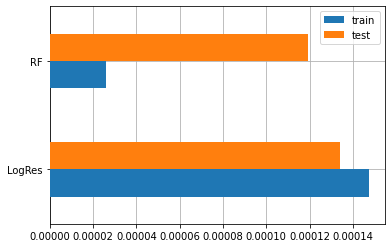

In [ ]:
#plotting MSE

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

## Bobot dan nilai Bias Logistic Regression

Mencari weight/bobot dari masing-masing variabel yang ada dalam model Linear Regression. Pencarian ini dilakukan secara matematis untuk mengetahui nilai dari bobot tiap variabel, dan nilai bias dari sistem setelah dilakukan sejumlah N perulangan.

In [ ]:
#mencari weight/bobot dari masing-masing variabel yang ada dalam model

print("Nilai Bobot Tiap Variabel:\n{}\n\nNilai Bias: {}\n\nBanyaknya iterasi: {}".format(model_logRes.coef_[0], model_logRes.intercept_[0], model_logRes.n_iter_[0]))

Nilai Bobot Tiap Variabel:
[ 0.43435132  0.06444877 -0.07364571  0.29695524  0.21615732  0.63344068
  0.16974621  0.0995346   0.0347053   0.28958578  0.05877288 -0.04884005
 -0.07666783  0.18943376]

Nilai Bias: -5.351232848907937

Banyaknya iterasi: 292


## Confusion Matrix Logistic Regression

Membuat confusion matrix untuk mengetahui letak prediksi yang salah, maupun prediksi yang benar pada saat model melakukan prediksi.

In [ ]:
#membuat confusion matrix untuk mengetahui letak kesalahan pada prediksi model

cn_logRes = confusion_matrix(y_test,y_pred_logRes)
print("Confusion Matrix Logistic Regression:\n{}".format(cn_logRes))

Confusion Matrix Logistic Regression:
[[901   7]
 [135  17]]


## Heatmap visualisasi Confusion Matrix

Visualisasi data melalui heatmap untuk melihat lebih jelas distribusi dari hasil prediksi model.

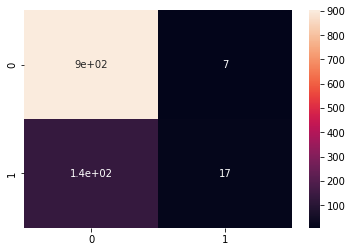

In [ ]:
#heatmap plot menggunakan sns
sns.heatmap(cn_logRes, annot=True)